In [20]:
pip install yfinance tensorflow


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: typing-extensions>=3.6.6 in c:\users\vinee\anaconda3\lib\site-packages (from tensorflow) (4.1.1)



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


[*********************100%%**********************]  1 of 1 completed
Epoch 1/50
19/19 [==============================] - 3s 13ms/step - loss: 0.3400
Epoch 2/50
19/19 [==============================] - 0s 13ms/step - loss: 0.0928
Epoch 3/50
19/19 [==============================] - 0s 13ms/step - loss: 0.0150
Epoch 4/50
19/19 [==============================] - 0s 13ms/step - loss: 0.0064
Epoch 5/50
19/19 [==============================] - 0s 14ms/step - loss: 0.0033
Epoch 6/50
19/19 [==============================] - 0s 13ms/step - loss: 0.0019
Epoch 7/50
19/19 [==============================] - 0s 13ms/step - loss: 0.0015
Epoch 8/50
19/19 [==============================] - 0s 13ms/step - loss: 0.0014
Epoch 9/50
19/19 [==============================] - 0s 13ms/step - loss: 0.0014
Epoch 10/50
19/19 [==============================] - 0s 13ms/step - loss: 0.0013
Epoch 11/50
19/19 [==============================] - 0s 13ms/step - loss: 0.0013
Epoch 12/50
19/19 [==============================

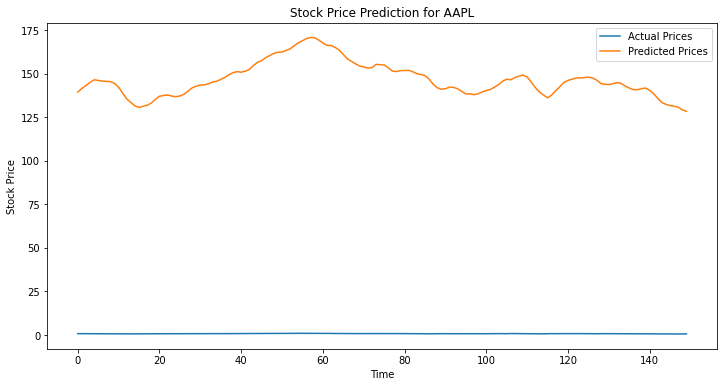

In [22]:
import numpy as np
import yfinance as yf
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Define a function to get stock data using yfinance
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Define a function to preprocess the data
def preprocess_data(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Define hyperparameters
ticker_symbol = 'AAPL'  # Change this to the desired stock symbol
start_date = '2020-01-01'
end_date = '2023-01-01'
seq_length = 10  # Number of previous days' stock prices to use for prediction

# Get stock data
stock_data = get_stock_data(ticker_symbol, start_date, end_date)

# Check if data is available
if stock_data.empty:
    print("No stock data available.")
    exit()

close_prices = stock_data['Close'].values

# Check if close_prices array is empty
if close_prices.size == 0:
    print("No stock price data available.")
    exit()

# Normalize data
normalized_data = (close_prices - np.min(close_prices)) / (np.max(close_prices) - np.min(close_prices))

# Preprocess data
X, y = preprocess_data(normalized_data, seq_length)

# Check if X or y are empty
if X.size == 0 or y.size == 0:
    print("Insufficient data for preprocessing.")
    exit()

# Split data into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions on test data
predicted_prices = model.predict(X_test)

# Denormalize the predictions
predicted_prices = predicted_prices * (np.max(close_prices) - np.min(close_prices)) + np.min(close_prices)

# Plot the actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Prices')
plt.plot(predicted_prices, label='Predicted Prices')
plt.title(f'Stock Price Prediction for {ticker_symbol}')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

